# Part I - Sample Superstore Data Exploration
## by Oluwabukola Odutayo

## Introduction
> The superstore dataset is a dataset about a company's sales and profits. It is has information about sales, profit and quantity of products ordered from the comapny. The dataset has 9,994 rows and 21 columns.

> The dataset contains features like:
1. Profit - Profits or loss incured
2. Order Date - Date a particular product was ordered
3. Sales - Amount of sales made by a particular product
4. Segment - The segment where the Customer belongs.
5. Country - Country of residence of the Customer.
6. City - City of residence of of the Customer.
7. Category - Category of the product ordered.
8. Sub-Category - Sub-Category of the product ordered.
9. Product Name - Name of the Product and many others




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('Superstore.csv', engine='python')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# we check the structure of the dataset
df.shape

(9994, 21)

In [4]:
# Check to get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null object
Ship Date        9994 non-null object
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: float64(3), int64(3), object(15)
memory usage: 1.6+ MB


In [5]:
# checking to see get more discriptions about the columns
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# samopling the dataset to check for random rows
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4713,4714,CA-2014-108273,12/16/2014,12/21/2014,Standard Class,EJ-13720,Ed Jacobs,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",56.568,2,0.6,-74.9526
5394,5395,US-2014-123183,11/19/2014,11/25/2014,Standard Class,GR-14560,Georgia Rosenberg,Corporate,United States,Wilmington,...,19805,East,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases,1025.880,6,0.0,235.9524
7841,7842,CA-2016-116603,7/17/2016,7/22/2016,Standard Class,AT-10735,Annie Thurman,Consumer,United States,New York City,...,10024,East,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,45.960,2,0.0,13.7880
1079,1080,CA-2017-132521,9/23/2017,9/25/2017,Second Class,DW-13540,Don Weiss,Consumer,United States,Seattle,...,98105,West,OFF-BI-10000404,Office Supplies,Binders,Avery Printable Repositionable Plastic Tabs,6.880,1,0.2,2.3220
4447,4448,US-2014-147704,11/16/2014,11/21/2014,Standard Class,SR-20740,Steven Roelle,Home Office,United States,Bloomington,...,47401,Central,OFF-ST-10000675,Office Supplies,Storage,"File Shuttle II and Handi-File, Black",169.450,5,0.0,42.3625


In [7]:
# check for null values in the dataset
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### There are no null values in the dataset

In [8]:
# check for duplicated entried in the dataset
df.duplicated().sum()

0

#### There are also no duplicated eneries in the dataset.

In [9]:
# check the list of colums o get column names
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### Some of the features are not needed, so we have to drop those features that are not needed in analysis

In [10]:
# dropping rows that will not be needed for exploration
df.drop(['Row ID','Order ID','Customer ID','Postal Code','Product ID'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
Order Date       9994 non-null object
Ship Date        9994 non-null object
Ship Mode        9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Region           9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: float64(3), int64(1), object(12)
memory usage: 1.2+ MB


#### On looking at the order Date and ship dat, theyhave the wrong data type. therefore we have to convert it to datetime format

In [11]:
# converting the order date and ship date to date time format
df["Order Date"] = pd.to_datetime(df["Order Date"], yearfirst = True)
df["Ship Date"] = pd.to_datetime(df["Ship Date"], yearfirst = True)

In [12]:
# checking to confirm the data type has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Region           9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(10)
memory usage: 1.2+ MB


### What is the structure of your dataset?

> The dataset has 9994 details about products with 21 features on each product which consists of numerical and categorical values.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in features like the sales, the profit, the quantity ordered and the performance other features based on these three features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features I am looking to explore are: Sales, Profit, Quantity ordered, Region, State, Categories, etc.

## Univariate Exploration



In [13]:
def Countplot(df, xvar, huevar=None, color=0, palette=None, order=None):
    #set plot dimentions
    plt.figure(figsize = [10,6])
    #plot
    sb.countplot(data=df, x=xvar, hue=huevar, color=sb.color_palette()[color], palette=palette, order=order, edgecolor='black')
    #clean up variable names
    xvar = xvar.replace("_"," ")
    if huevar:
        huevar = huevar.replace("_"," ")
    #add title and format it
    plt.title(f"Distribution of Products: {xvar} {'by' if huevar else ''} {huevar if huevar else ''}" .title(), fontsize=14, weight='bold')
    #add x label and format it
    plt.xlabel(xvar.title(), fontsize=10, weight='bold')
    #add y label and format it
    plt.ylabel('Frequency', fontsize=10, weight = 'bold')

### Segment

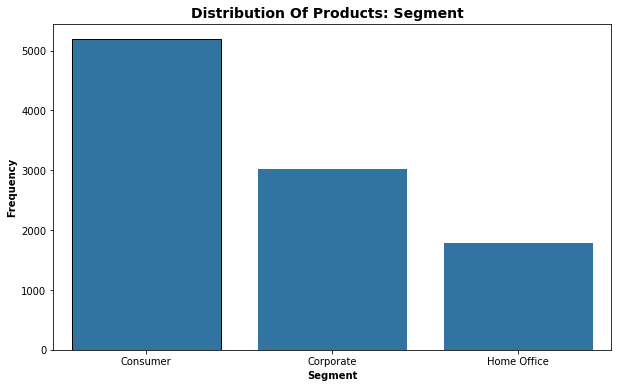

In [14]:
Countplot(df,"Segment")

#### Majority of the products sold are Consumer Products

### Category 

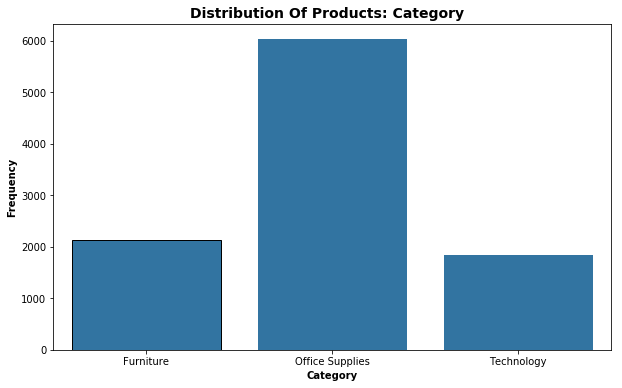

In [15]:
Countplot(df,"Category")

#### Office supplies are the most common product

### Sub Category

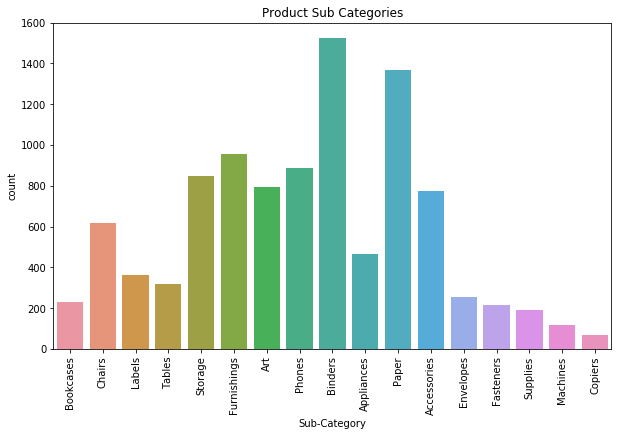

In [16]:
# setting the plot size
plt.figure(figsize = [10, 6])
plt.title('Product Sub Categories')
plt.xticks(rotation = 90)
#plot
sb.countplot(df["Sub-Category"]);

#### Binders are the most common sub categories

### Quantity Ordered

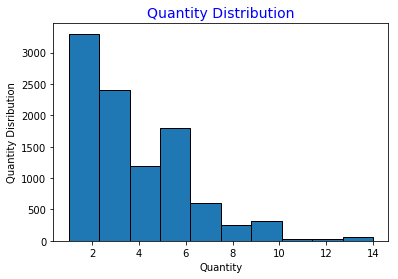

In [34]:
# assigning the title of the plot
plt.title('Quantity Distribution', fontsize=14, color='blue')
# setting the axis labels
plt.xlabel("Quantity")
plt.ylabel("Quantity Disribution")
#plot
plt.hist(df["Quantity"], edgecolor='black');

#### Majority of the customers order mostly 2 products

### Sales

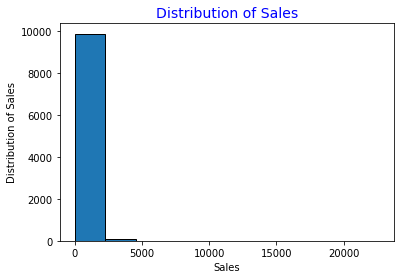

In [33]:
# assigning the title of the plot
plt.title('Distribution of Sales', fontsize=14, color='blue')
# setting the axis labels
plt.xlabel("Sales")
plt.ylabel("Distribution of Sales")
#plot
plt.hist(df["Sales"], edgecolor='black');

#### The distribution of sales is mostly skewed to the left

### Geographical Distribution of Customers

#### Region

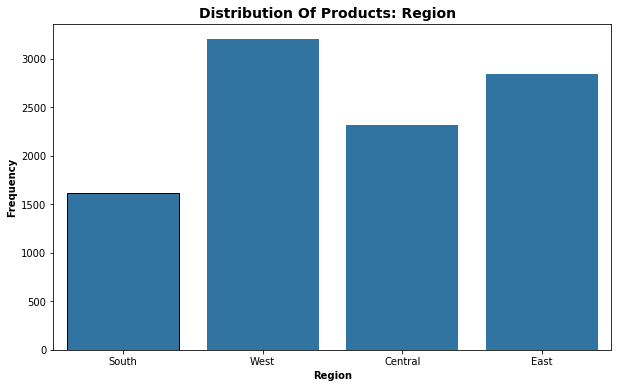

In [19]:
Countplot(df,"Region")

#### The west is the most common region

#### State

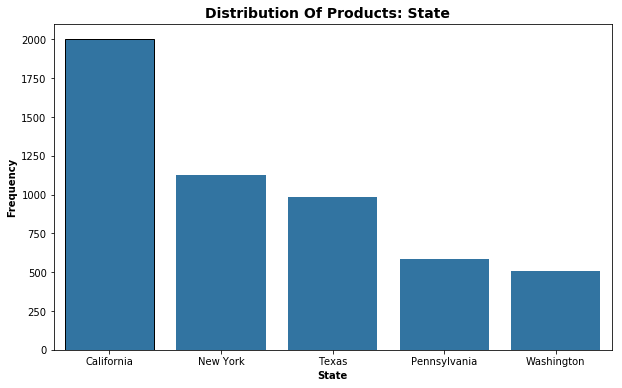

In [20]:
Countplot(df,"State",order = df.State.value_counts().iloc[:5].index )

#### Carlifornia is the state with the most number of customers

#### City

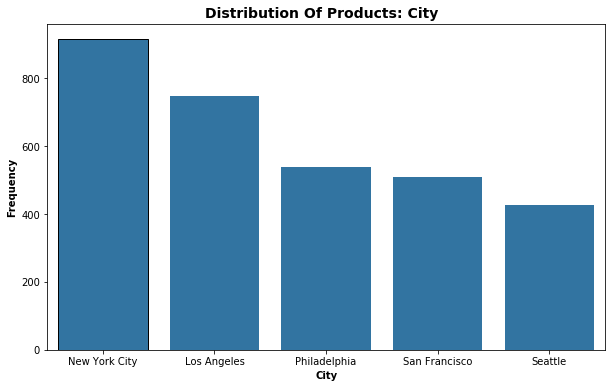

In [21]:
Countplot(df,"City",order = df.City.value_counts().iloc[:5].index )

#### New york city has the highest number of customers

### Products

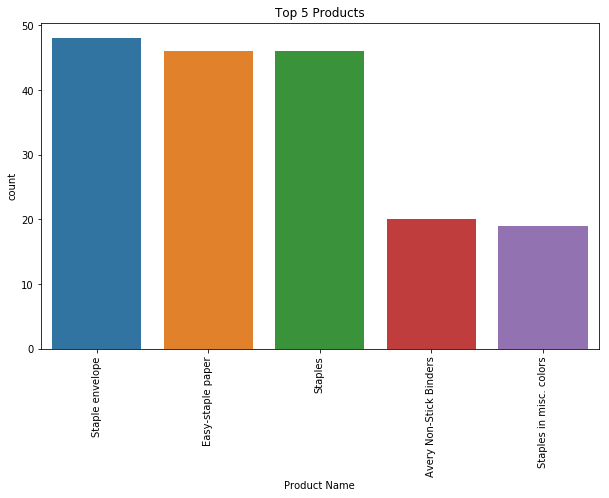

In [35]:
# setting the plot size
plt.figure(figsize = [10, 6])
# assigning the title of the plot
plt.title('Top 5 Products')
plt.xticks(rotation = 90)
#plot
sb.countplot(data = df, x = 'Product Name', order=df['Product Name'].value_counts().iloc[:5].index);

#### Staple Envelope is the most common product

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Majority ofthe product sold are office supplies, and states like california and New york had the most customers. There was no unusual points in the dataset at the moment further analysis might reveal better
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The Profit variable Have unusual dirstributions due to some negative figures.  I did not perform any operations to the data.

## Bivariate Exploration



### Profits by Region

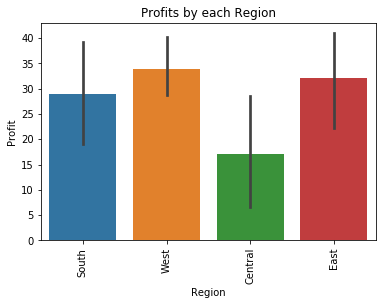

In [23]:
#plot
sb.barplot(x = 'Region',y = 'Profit',data = df)
plt.xticks(rotation = 90)
# setting the axis labels
plt.xlabel('Region')
plt.ylabel('Profit')
# assigning the title of the plot
plt.title('Profits by each Region');

#### The west has the highest profit

### Sales by Region

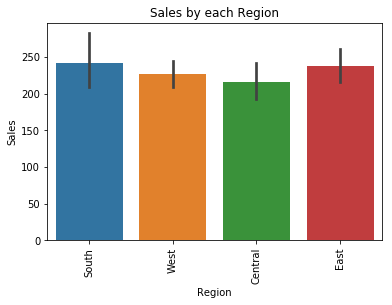

In [24]:
#plot
sb.barplot(x = 'Region',y = 'Sales',data = df)
plt.xticks(rotation = 90)
# setting the axis labels
plt.xlabel('Region')
plt.ylabel('Sales')
# assigning the title of the plot
plt.title('Sales by each Region');

#### The East made the highest sales but made lesser profit than the west

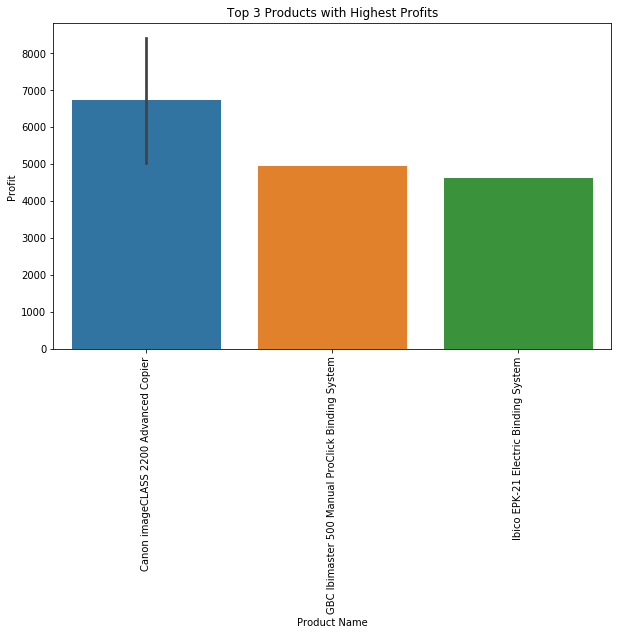

In [36]:
# setting the plot size
plt.figure(figsize = [10, 6])
# assigning the title of the plot
plt.title('Top 3 Products with Highest Profits')
plt.xticks(rotation = 90)
#plot
sb.barplot(data = df.sort_values('Profit',ascending = False).head(5), x = 'Product Name', y = 'Profit');

#### The CanonimageCLASS 2200 Advanced Copier made the post profit among all the products. i advice the company stock more of the product

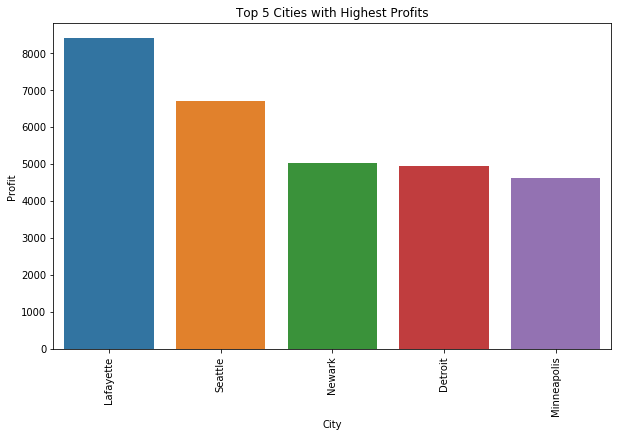

In [37]:
# setting the plot size
plt.figure(figsize = [10, 6])
# assigning the title of the plot
plt.title('Top 5 Cities with Highest Profits')
plt.xticks(rotation = 90)
#plot
sb.barplot(data = df.sort_values('Profit',ascending = False).head(5), x = 'City', y = 'Profit');

#### Lafatette is the city that made the most profit

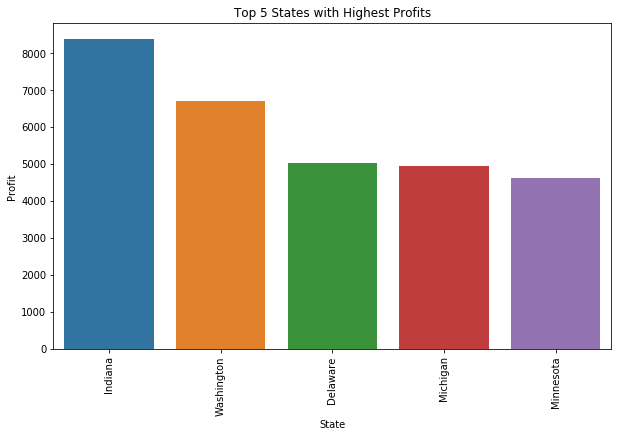

In [38]:
# setting the plot size
plt.figure(figsize = [10, 6])
# assigning the title of the plot
plt.title('Top 5 States with Highest Profits')
plt.xticks(rotation = 90)
#plot
sb.barplot(data = df.sort_values('Profit',ascending = False).head(5), x = 'State', y = 'Profit');

#### Indiana is the state with the highest profit

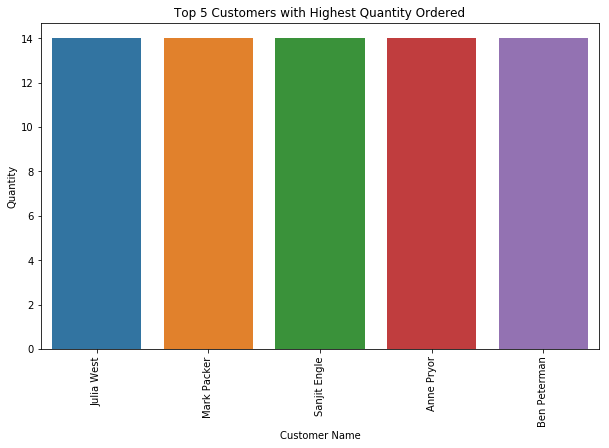

In [39]:
# setting the plot size
plt.figure(figsize = [10, 6])
# assigning the title of the plot
plt.title('Top 5 Customers with Highest Quantity Ordered')
plt.xticks(rotation = 90)
#plot
sb.barplot(data = df.sort_values('Quantity',ascending = False).head(5), x = 'Customer Name', y = 'Quantity');

#### Ben Peterman Ordered most products

### Quantity Ordered and Profit 

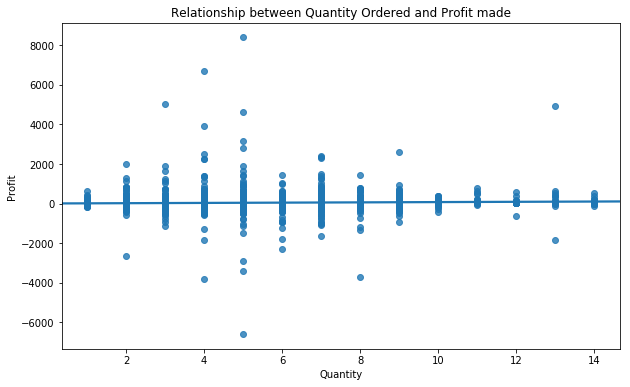

In [40]:
# setting the plot size
plt.figure(figsize = [10, 6])
# assigning the title of the plot
plt.title('Relationship between Quantity Ordered and Profit made')
# setting the axis labels
plt.xlabel('Quantity')
plt.ylabel('Profit')
#plot
sb.regplot(x="Quantity",y="Profit",data=df);

#### there is no relationship between the quantity of products ordered and profit

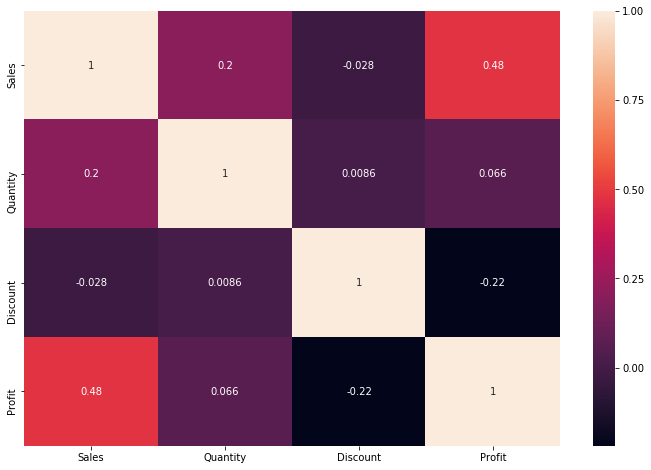

In [41]:
# setting the plot size
plt.figure(figsize = [12, 8])
#plot
sb.heatmap(df.corr(),annot = True);

#### There is no relationship between any of the numerical feature(Sales, Quantity ordered, Profit and Discount)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> After visualizing a few of the variables to understand the relationships beween one another other. I discoverd that even though the east region made more sales, they didn't have the highest profit compared to other regions

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I didnt perform exploration on some of the variables because i feel they wont help in generating more profits

## Multivariate Exploration



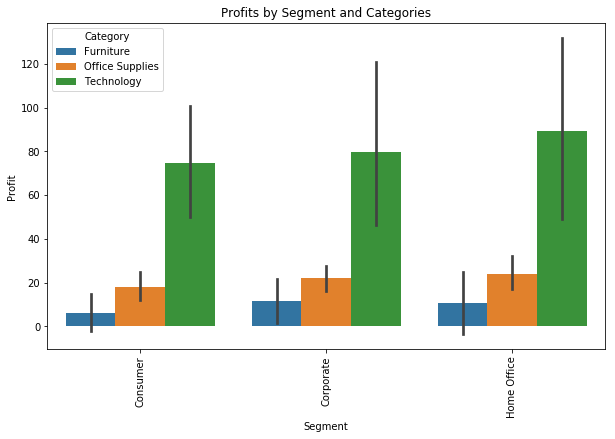

In [42]:
# setting the plot size
plt.figure(figsize = [10, 6])
# assigning the title of the plot
plt.title('Profits by Segment and Categories')
plt.xticks(rotation = 90)
#plot
sb.barplot(data = df, x = 'Segment', y = 'Profit', hue = "Category");

#### Technology seems to have the most profit among all the segments

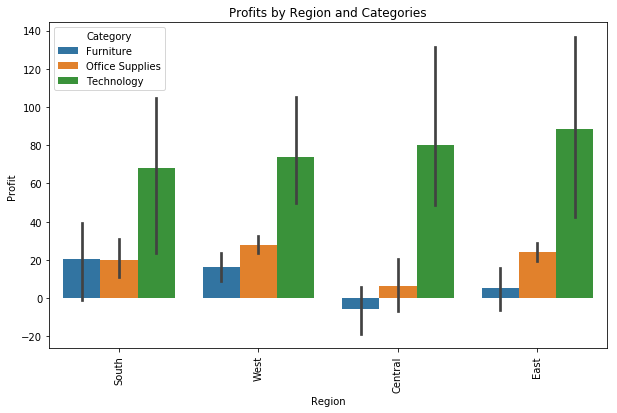

In [43]:
# setting the plot size
plt.figure(figsize = [10, 6])
# assigning the title of the plot
plt.title('Profits by Region and Categories')
plt.xticks(rotation = 90)
#plot
sb.barplot(data = df, x = 'Region', y = 'Profit', hue = "Category");

#### Technology has the highest profit across all the regions

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The only relationship that seems to be constant is the high profit in the technological category acrros board

### Were there any interesting or surprising interactions between features?

> Surprisingly, there was no intersting interactions between the numerical features. ie. increase in sales does not guraantee increase in profit or increase in discount does not guarantee there will be increase in quantity ordered

## Conclusions
- Technology has the highest profit across all the regions, so i advice the company stock more of technoligical products
- Discount does not influence the amount of quantity ordered. i suggest the comapany try to increase the discount on higher quantity orders
- States like Carlifornia and New york should be stocked with more products due to high amount of customers
- New york city has the highest number of customers among all the cities and should be stocked with more products
